<a href="https://colab.research.google.com/github/Sylar257/My-data-science-tool-kit/blob/master/145_PyTorch_Tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 145 PyTorch Tricks
This is a series of useful PyTorch tricks inspired by **vainaijr** in his [YouTube channel](https://www.youtube.com/watch?v=nnHQT9JnY74&list=PLUY8w37x-QUUkawz-cBnjLpvaZWvPZh_s&index=2&t=29s).<br>
This notebook is an implementation of all these techniques and is designed in a way to best demonstrate their usefulness.

# Trick #1
Visualization model using `torchsummaryX`

In [0]:
import torch
import torchvision.models as models
from Utils import *

Here we will build a Single-shot-detection model with just 20 classes.

In [0]:
# Create SSD300 with pretrained weights in the base-architecture
n_classes = 20
model = SSD300(n_classes)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:05<00:00, 107MB/s]



Loaded base model with pre-trained weights



In [0]:
# install torchsummaryX
!pip install torchsummaryX

In [0]:
from torchsummaryX import summary

`summary(model, input)` takes our intentional model and a pseudo input **with the correct shape**

In [0]:
# pseudo input of batch size = 3, num_channel = 3, pixel: 300x300
summary(model, torch.zeros((3,3,300,300)))

                                         Kernel Shape        Output Shape  \
Layer                                                                       
0_base.Conv2d_conv1_1                   [3, 64, 3, 3]   [3, 64, 300, 300]   
1_base.BatchNorm2d_bn_1_1                        [64]   [3, 64, 300, 300]   
2_base.Conv2d_conv1_2                  [64, 64, 3, 3]   [3, 64, 300, 300]   
3_base.BatchNorm2d_bn_1_2                        [64]   [3, 64, 300, 300]   
4_base.MaxPool2d_pool1                              -   [3, 64, 150, 150]   
5_base.Conv2d_conv2_1                 [64, 128, 3, 3]  [3, 128, 150, 150]   
6_base.BatchNorm2d_bn_2_1                       [128]  [3, 128, 150, 150]   
7_base.Conv2d_conv2_2                [128, 128, 3, 3]  [3, 128, 150, 150]   
8_base.BatchNorm2d_bn_2_2                       [128]  [3, 128, 150, 150]   
9_base.MaxPool2d_pool2                              -    [3, 128, 75, 75]   
10_base.Conv2d_conv3_1               [128, 256, 3, 3]    [3, 256, 75, 75]   

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_base.Conv2d_conv1_1,"[3, 64, 3, 3]","[3, 64, 300, 300]",1792.0,1.555200e+08
1_base.BatchNorm2d_bn_1_1,[64],"[3, 64, 300, 300]",128.0,6.400000e+01
2_base.Conv2d_conv1_2,"[64, 64, 3, 3]","[3, 64, 300, 300]",36928.0,3.317760e+09
3_base.BatchNorm2d_bn_1_2,[64],"[3, 64, 300, 300]",128.0,6.400000e+01
4_base.MaxPool2d_pool1,-,"[3, 64, 150, 150]",NaN,NaN
5_base.Conv2d_conv2_1,"[64, 128, 3, 3]","[3, 128, 150, 150]",73856.0,1.658880e+09
6_base.BatchNorm2d_bn_2_1,[128],"[3, 128, 150, 150]",256.0,1.280000e+02
7_base.Conv2d_conv2_2,"[128, 128, 3, 3]","[3, 128, 150, 150]",147584.0,3.317760e+09
8_base.BatchNorm2d_bn_2_2,[128],"[3, 128, 150, 150]",256.0,1.280000e+02


Final Note: Normally, if we use architectures directly from `TorchVision` or `Keras` we would have nice model summary just like this.<br>
This libarary is particular useful when we want to inspect user people's model or a verions that we have modified besed on commonly used models like the example above.<br>
In addition, we have a nice visualization of **num of parameters** & **output demension** for each layer which is kind of nice for debugging your own model or simply for reference.


# Trick #2
PyTorch Hooks

PyTorch hook is a tool that we can *register* to any **tensor** or **nn.Module** during our computation so that we can monitor what is going on with our `forward` and `backward` loops.<bR>
The `forward` is not refered to `nn.Module.forward` bu the `torch.Autograd.Function` object that is the `grad_fn` of a **tensor**.<br>
Notice, that a `nn.Module` like `nn.Linear` can have multiple `forward` invocations. It's output is created by two operations, $Y = W*X+B$, *addition* and *multiplication* and thus there will be two `forward` calls. 

## Hook types
1. The Forward Hook
2. The Backward Hook

A forward hook is excuted during the forward pass, while the backward hook is executed when `backward` function is called both of which are *functions* of `Autograd.Funciton` object.

A hook in PyTorch is basically a function, with a very specific signature. When we say a hook is executed, in reality, we are talkingabout this function being executed.<br>
`grad` is basically the value contained in the `grad` attribute of the tensor **after** `backward` is called. The function is not supposed to modify it's argument. It must either return `None` or a Tensor which will be used in place of `grad` for further gradient computations.<br>
The below example clarifies this point:

In [0]:
import torch
a = torch.ones(10)
a.requires_grad

False

In [0]:
a.requires_grad = True
a.requires_grad

True

In [0]:
b = 2*a
b.requires_grad

True

In [0]:
print(a.is_leaf)
print(b.is_leaf)

True
False


Since `b` is not a **leaf Variable**, its `grad` will by degault be destroyed during computation.<br>
We can used `b.retain_grad()` to ask PyTorch to retain its `grad`

In [0]:
b.retain_grad()

In [0]:
c = b.mean()
print(f"requires_grad: {c.requires_grad}")
print(f"is_lead: {c.is_leaf}")

requires_grad: True
is_lead: False


In [0]:
# pretend c is the loss being computed
c.backward()
print(a.grad, b.grad)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


Now we redo the experiment but with a **hook** that multiplies `b`'s grad by 2

In [0]:
a = torch.ones(10)
a.requires_grad = True
b = 2*a
b.retain_grad()
b.register_hook(lambda x:print(x))
b.mean().backward() # pretend the mean of b is the loss we want to back-prop

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


Here we can see that, the print out is exactly the same result by using **hook** on `b`, and the `lambda` function automatically take the `b.grad` as input.<br>
This gives us a sense that hook is tracking.

In [0]:
print(a.grad, b.grad)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


There are several uses of functionality as above:
1. We can print the *value* of gradient for **debugging**. We can also log them. This is especially useful with `non-leaf` variables whose gradients are freed up unless we perform `retain_grad` upon them. Doing the latter can lead to increased memory retention. Hooks provide much cleaner way to aggregate these values.
2. We can modify gradient **during** the backward pass. This is very important. While we can still access the `grad` variable of a tensor in a network, we can only access it after the **entire backward pass** has been processed. For example, we multiplied `b`'s gradient by 2, and now the subsequent gradient calculations, like those of `a`(or any tensor that will depend upon `b` for gradient) used `2*brad(b)` instead of `grad(b)`. In contrast, had we individually updated the parameters **after** the `backward`, we'd have to multily `b.grad` as well as `a.grad`

In [0]:
# to demonstrate
a = torch.ones(10)
a.requires_grad = True
b = 2*a
b.retain_grad()
b.mean().backward()

print(a.grad, b.grad)

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])


In [0]:
b.grad *= 2
print(a.grad, b.grad) # Note that in this case, a's grad needs to be updated mannually

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000]) tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000])


## Hooks for nn.Module objects
For **backward hook**:
`hook(module, grad_input, grad_output)`
___
For **forward hook**:
`hook(module, input, output)`
___

In [0]:
import torch.nn as nn
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3,10,2, stride=2) # (8-2+0)/2+1 = 4
        self.relu = nn.ReLU()
        self.flatten = lambda x: x.view(-1)
        self.fc1  = nn.Linear(160,5)

    def forward(self, x):
        x = self.relu(self.conv(x))
        return self.fc1(self.flatten(x))

In [0]:
Net = myNet()
summary(Net,torch.zeros(1,3,8,8))

         Kernel Shape   Output Shape Params Mult-Adds
Layer                                                
0_conv  [3, 10, 2, 2]  [1, 10, 4, 4]  130.0     1.92k
1_relu              -  [1, 10, 4, 4]      -         -
2_fc1        [160, 5]            [5]  805.0     800.0
-------------------------------------------------------
                      Totals
Total params           935.0
Trainable params       935.0
Non-trainable params     0.0
Mult-Adds              2.72k


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_conv,"[3, 10, 2, 2]","[1, 10, 4, 4]",130.0,1920.0
1_relu,-,"[1, 10, 4, 4]",NaN,NaN
2_fc1,"[160, 5]",[5],805.0,800.0


In [0]:
def hook_fn(m,i,o):
    print(m)
    print("---------Input Grad----------")

    for grad in i:
        try:
            print(grad.shape)
        except AttributeError:
            print("None found for input Gradient")
    
    print("--------Output Grad----------")
    for grad in o:
        try:
            print(grad.shape)
        except AttributeError:
            print("None found for output Gradient")
    print("\n")

In [0]:
Net.named_modules

<bound method Module.named_modules of myNet(
  (conv): Conv2d(3, 10, kernel_size=(2, 2), stride=(2, 2))
  (relu): ReLU()
  (fc1): Linear(in_features=160, out_features=5, bias=True)
)>

In [0]:
Net.conv.register_backward_hook(hook_fn)

In [0]:
Net.fc1.register_backward_hook(hook_fn)

In [0]:
inp = torch.rand(1,3,8,8)
out = Net(inp)
out

tensor([ 0.1495, -0.0683,  0.1981,  0.0851, -0.0905], grad_fn=<AddBackward0>)

In [0]:
# pretend we have the following as loss
(1-out.mean()).backward()

Linear(in_features=160, out_features=5, bias=True)
---------Input Grad----------
torch.Size([5])
torch.Size([5])
--------Output Grad----------
torch.Size([5])


Conv2d(3, 10, kernel_size=(2, 2), stride=(2, 2))
---------Input Grad----------
None found for input Gradient
torch.Size([10, 3, 2, 2])
torch.Size([10])
--------Output Grad----------
torch.Size([1, 10, 4, 4])




Note that, the `Linear layer` gets called first because the backward pass actually go through it first and then backprop to the `conv layer`

## Proper way of implementing Hooks(in **back-prop**)er way of implementing Hooks(in **back-prop**)

We have:
1.  torch.autograd.Variable.register_hook (Python method, in Automatic differentiation package)
2.  torch.nn.Module.register_backward_hook (Python method, in torch.nn)
3.  torch.nn.Module.register_forward_hook

The first `register_hook`，is for any **Variable**. It's essentially a **callback** function that is going to be executed every time when `Autograd` gradient is computed.<br>
While `Module.register_backward_hook` & `n.Module.register_forward_hook` are for `nn.Module` object and their `hook_fn` shoud take torch:
<br>`def hook_fn(m, i, o):` where `i` refers to input and `o` refers to output

### An example
Using `named_parameters` function we can accomplish `gradient modifying/clipping`. <br>
The following example does two things:
1. Turn gradients of linear biases into zero while back-prop (no updates for biase)
2. Make sure that for no gradient going to `conv layer` is less than 0 (all positive)

In [0]:
class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(3,10,2,stride=2)
        self.relu = nn.ReLU()
        self.flatten = lambda x: x.view(-1)
        self.fc1  = nn.Linear(160,5)
    def forward(self,x):
        x = self.relu(self.conv(x))
        x.register_hook(lambda grad: torch.clamp(grad, min=0)) # minimun back-prop gradient of value 0

        # print whether there is any negative grad
        x.register_hook(lambda grad: print("Gradients less than zero:", bool((grad<0).any())))
        
        return self.fc1(self.flatten(x))

In [0]:
net = myNet()

In [0]:
for name, param in net.named_parameters():
    print(name)

conv.weight
conv.bias
fc1.weight
fc1.bias


In [0]:
for name, param in net.named_parameters():
    if 'fc' in name and 'bias' in name:
        print(name, param, sep='\n')

fc1.bias
Parameter containing:
tensor([-0.0190, -0.0193, -0.0728,  0.0082,  0.0160], requires_grad=True)


In [0]:
for name, param in net.named_parameters():
    if 'fc' in name and 'bias' in name:
        # assign zero to bias grad with identical dimensions
        param.register_hook(lambda grad: torch.zeros_like(grad))

In [0]:
out = net(torch.randn(1,3,8,8))

In [0]:
(1-out).mean().backward()

Gradients less than zero: False


In [0]:
print(f'the bias for linear layer is: {net.fc1.bias.grad}')

the bias for linear layer is: tensor([0., 0., 0., 0., 0.])


# Trick #3
flops_counter_PyTorch

### Flop counter for convolutional networks in PyTorch framework
This script is designed to compute the theoretical amount of multiply-add operations in CNNs.<br>
It also can compute the number of parameters and print *per-layer* computational cost of a givent network.<br>
Supported layers:
* Conv1d/2d/3d (including grouping)
* ConvTranspose2d (including grouping)
* BatchNorm1d/2d/3d
* Activations (ReLU, PReLU, ELU, ReLU6, LeakyReLU)
* Linear
* Upsample
* Poolings (AvgPool1d/2d/3d, MaxPool1d/2d/3d and adaptive ones)

### Usage tips
* This script doesn't take into account `torch.nn.functional`.* operations. For an instance, if one have a semantic segmentation model and use `torch.nn.functional.interpolate` to upscale features, these operations won't contribute to overall amount of flops. To avoid that one can use `torch.nn.Upsample` instead of `torch.nn.functional.interpolate`.
* `ptflops` launches a given model on a random tensor and estimates amount of computations during inference. Complicated models can have several inputs, some of them could be optional. To construct non-trivial input one can use the `input_constructor` argument of the `get_model_complexity_info`. `input_constructor` is a function that takes the input spatial resolution as a tuple and returns a dict with named input arguments of the model. Next this dict would be passed to the model as keyworded arguments.

In [0]:
!pip install --upgrade git+https://github.com/sovrasov/flops-counter.pytorch.git

  Cloning https://github.com/sovrasov/flops-counter.pytorch.git to /tmp/pip-req-build-v7epwkpj
  Running command git clone -q https://github.com/sovrasov/flops-counter.pytorch.git /tmp/pip-req-build-v7epwkpj
  Created wheel for ptflops: filename=ptflops-0.4-cp36-none-any.whl size=7862 sha256=3c1336b31600d48dbfd47b4fb2efedee3613e1ae1326ea3c7cace7d59a885645
  Stored in directory: /tmp/pip-ephem-wheel-cache-f276_ger/wheels/00/ce/d1/169969eba40b2078b42c637bc9aac0f265e75a8a951b4e8570
Successfully built ptflops


In [0]:
import torch
import torchvision.models as models
from Utils import *

In [0]:
# Create SSD300 with pretrained weights in the base-architecture
n_classes = 20
model = SSD300(n_classes)


Loaded base model with pre-trained weights



In [0]:
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
    model = SSD300(n_classes)
    flops, params = get_model_complexity_info(model, (3,300,300))
    print(f'Flops: {flops}')
    print(f'Params: {params}')


Loaded base model with pre-trained weights

SSD300(
  31.409 GMac, 100.000% MACs, 
  (base): VGGBase_BN(
    29.983 GMac, 95.461% MACs, 
    (conv1_1): Conv2d(0.161 GMac, 0.513% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_1_1): BatchNorm2d(0.012 GMac, 0.037% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv1_2): Conv2d(3.324 GMac, 10.581% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_1_2): BatchNorm2d(0.012 GMac, 0.037% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool1): MaxPool2d(0.006 GMac, 0.018% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(1.662 GMac, 5.291% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_2_1): BatchNorm2d(0.006 GMac, 0.018% MACs, 128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2_2): Conv2d(3.321 GMac, 10.572% MACs, 128, 128, kernel_size=(3

In [0]:
get_model_complexity_info??

# Trick #4
Torchviz to visualize PyTorch execution graphs and traces

In [15]:
!pip install torchviz

     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=0affc6da8f5f01332395a52be0b79c445c33958b783e4ccfcd50fedb29b878bc
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


### Let's start with a basic example(base MLP model)

In [0]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

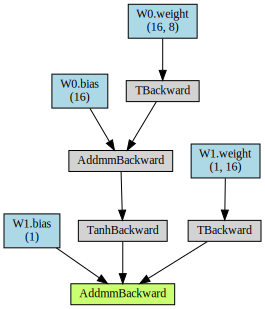

In [18]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8,16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16,1))

inp = torch.randn(1,8)

make_dot(model(inp), params = dict(model.named_parameters()))

The method is built for directed graphs of PyTorch operations, built during **forward** propagation and showing which operations will be called on **backward**. <br>
It omits subgraphs which do not require gradients.

### Visualiza AlexNet

In [0]:
from torchvision.models import AlexNet

model = AlexNet()


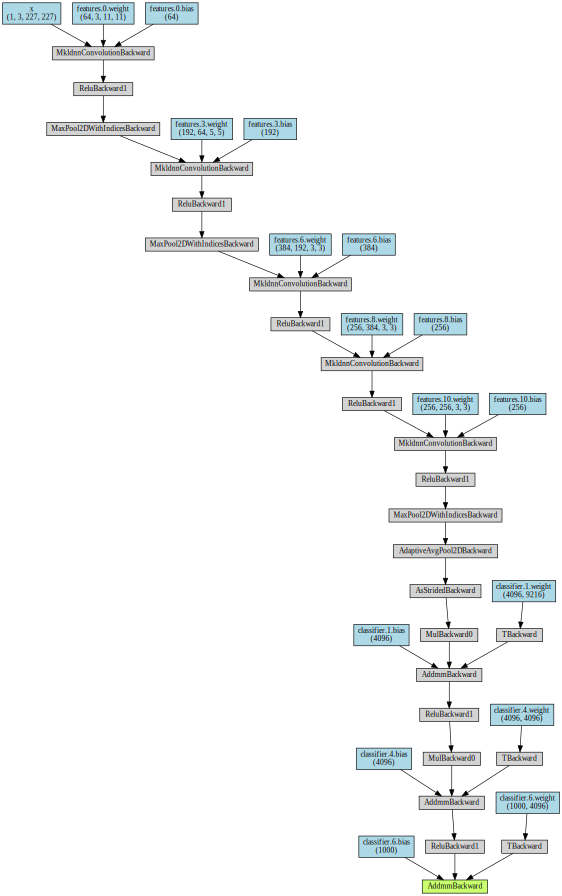

In [24]:
x = torch.randn(1,3,227,227).requires_grad_(True)
y = model(x)
make_dot(y, params = dict(list(model.named_parameters()) + [('x',x)]))

In [28]:
import torch
import torchvision.models as models
from Utils import *

# Create SSD300 with pretrained weights in the base-architecture
n_classes = 20
model = SSD300(n_classes)


Loaded base model with pre-trained weights



In [0]:
x = torch.randn(1,3,300,300)
y = model(x)
dot = make_dot(y, params = dict(list(model.named_parameters())))

In [34]:
dot.render('VGG300_BN.gv', view=True)  

'VGG300_BN.gv.pdf'

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Trick #5
[Awesome PyTorch list](https://github.com/bharathgs/Awesome-pytorch-list)
This is a truly awesome repo full of practical tutorials that implements various state-of-the-art deep learning techniques using PyTorch including:
1. NLP & Speech Processing
2. Computer Vision
3. Probabilistic/Generative Libraries
4. Other libraries
5. Paper implementations<br>

Basically a good place to look into when starting a new project to check for relevant realization techniques.<br>
Since deep learning is such a fast developing fielding, if it weren't for the reason that this repo stoped getting updated 2 years ago, it should be #1 on this list.

# Trick #6

# Trick #7
**AdaBound optimizer**<br>
Finally, AdaBound is available in PyTorch. One of the most powerful optimizer that out performs Adam in some cases with super fast convergence rate. Definely, something you would want to try out when fast prototyping.<br>
The method is based on [Adaptive Gradient Methods with Dynamic Bound of Learning Rate](https://openreview.net/forum?id=Bkg3g2R9FX).In Proc. of ICLR 2019.

In [0]:
## implementation
optimizer = adabound.AdaBound(model.parameters(), lr=1e-3, final_lr=0.1)

As described in the paper, AdaBound is an optimizer that behavces like **Adam** at the beginning of the training, and gradually transforms to SGD at the end.  In this way, it can **combines the benefits of adaptive methods, viz. fast initial process, and the good final generalization properties of SGD.** <br>
The `final_lr` parameter indicates **Adabound** would transforms to an SGD with this learninig rate. In common cases, a default final learning rate of `0.1` can achieve relatively good and statble results on *unseen data*.<br>
This method is not very sensitive to it's hyperparameters. *See Appendix G of the paper for more details*

# Trick #8

# Trick #9

# Trick #10

# Trick #11

# Trick #12